# **Laptop Price Prediction**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('laptop.csv')

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
#We have to delete the unnamed columns

df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 11)

# EDA

In [ ]:
df.duplicated().sum()

58

In [ ]:
dupli=df[df.duplicated(keep=False)]
print(dupli)

     Company            TypeName Inches  \
20       NaN                 NaN    NaN   
46       NaN                 NaN    NaN   
50       NaN                 NaN    NaN   
115      NaN                 NaN    NaN   
125      NaN                 NaN    NaN   
...      ...                 ...    ...   
1298  Lenovo  2 in 1 Convertible     14   
1299  Lenovo  2 in 1 Convertible   13.3   
1300  Lenovo            Notebook     14   
1301      HP            Notebook   15.6   
1302    Asus            Notebook   15.6   

                                ScreenResolution  \
20                                           NaN   
46                                           NaN   
50                                           NaN   
115                                          NaN   
125                                          NaN   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300           

In [ ]:
duplicate_pairs = df[df.duplicated(keep=False)]
grouped_duplicates = duplicate_pairs.groupby(list(df.columns))

for group, duplicates in grouped_duplicates:
    print("Duplicate Group:")
    print(duplicates)
    print()

Duplicate Group:
     Company  TypeName Inches ScreenResolution  \
1263    Acer  Notebook   15.6         1366x768   
1277    Acer  Notebook   15.6         1366x768   
1291    Acer  Notebook   15.6         1366x768   

                                       Cpu  Ram     Memory  \
1263  Intel Celeron Dual Core N3060 1.6GHz  4GB  500GB HDD   
1277  Intel Celeron Dual Core N3060 1.6GHz  4GB  500GB HDD   
1291  Intel Celeron Dual Core N3060 1.6GHz  4GB  500GB HDD   

                        Gpu  OpSys Weight     Price  
1263  Intel HD Graphics 400  Linux  2.4kg  15397.92  
1277  Intel HD Graphics 400  Linux  2.4kg  15397.92  
1291  Intel HD Graphics 400  Linux  2.4kg  15397.92  

Duplicate Group:
     Company  TypeName Inches ScreenResolution  \
1172    Asus  Notebook   15.6         1366x768   
1274    Asus  Notebook   15.6         1366x768   
1288    Asus  Notebook   15.6         1366x768   
1302    Asus  Notebook   15.6         1366x768   

                                       Cpu  Ram 

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.isna().sum()

Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
df.shape

(1244, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), object(10)
memory usage: 116.6+ KB


In [ ]:
df['Ram']=df['Ram'].str.replace('GB','')

In [ ]:
df['Ram']=df['Ram'].astype('float')

In [ ]:
df['Weight'].value_counts()

2.2kg     106
2.1kg      57
2.4kg      41
2.5kg      37
2.3kg      37
         ... 
1.41kg      1
3.6kg       1
4.7kg       1
4.33kg      1
4.0kg       1
Name: Weight, Length: 189, dtype: int64

In [ ]:
df['Weight']=df['Weight'].str.replace('kg','')

In [ ]:
df[df['Weight']=='?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


In [ ]:
df['Weight']=df['Weight'].replace('?',np.nan)

In [ ]:
df['Weight']=df['Weight'].astype(float)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64

<AxesSubplot:ylabel='Weight'>

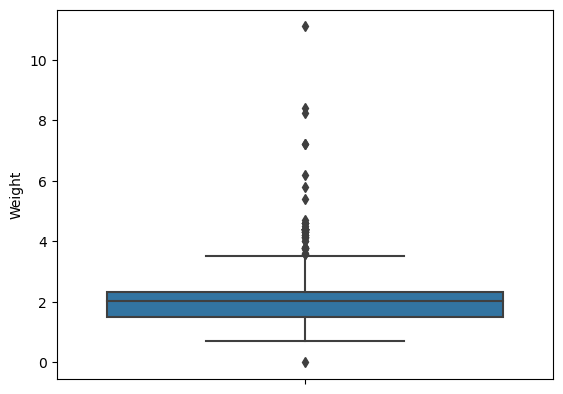

In [ ]:
sns.boxplot(y=df['Weight'],data=df)

In [ ]:
df['Weight']=df['Weight'].fillna(df['Weight'].median())

In [ ]:
df['Inches']=df['Inches'].replace('?',np.nan)

In [ ]:
df['Inches']=df['Inches'].astype('float')

<AxesSubplot:ylabel='Inches'>

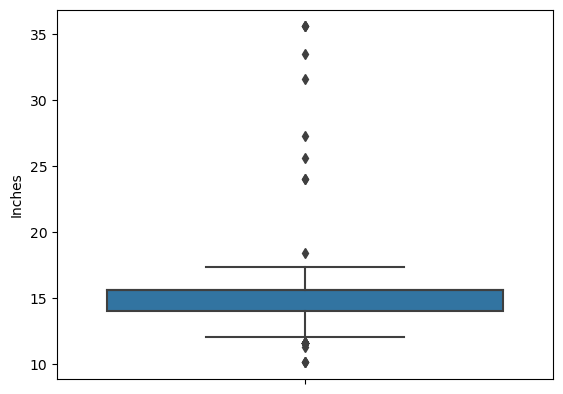

In [ ]:
sns.boxplot(y=df['Inches'],data=df)

In [ ]:
df['Inches']=df['Inches'].fillna(df['Inches'].median())

In [ ]:
df=df.reset_index()
df=df.drop(columns=['index'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   float64
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float64
 10  Price             1244 non-null   float64
dtypes: float64(4), object(7)
memory usage: 107.0+ KB


In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
df.shape

(1244, 11)

In [ ]:
df['OpSys'].value_counts()

Windows 10      1022
No OS             63
Linux             57
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: OpSys, dtype: int64

<AxesSubplot:ylabel='Density'>

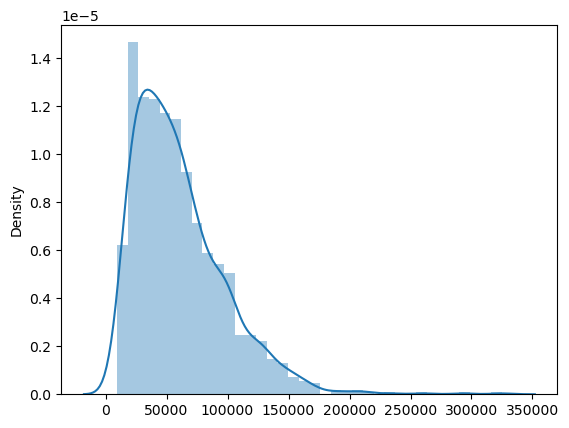

In [ ]:
sns.distplot(x=df['Price'])

**-->Data is skewed negatively skewed here the Laptop with Low price is more and the Laptop with High Price is Less**

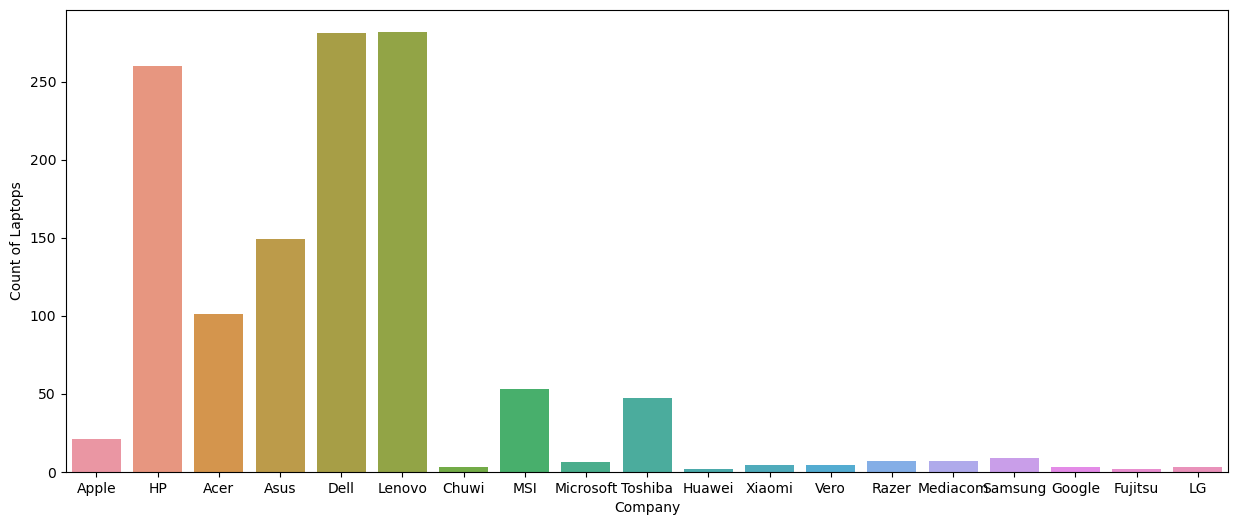

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Company'])
plt.xlabel('Company')
plt.ylabel('Count of Laptops')
plt.show()

**-->From the Above graph we can Understand the data set contains most of HP, Dell, Lenovo Laptops**

<AxesSubplot:xlabel='Company', ylabel='Price'>

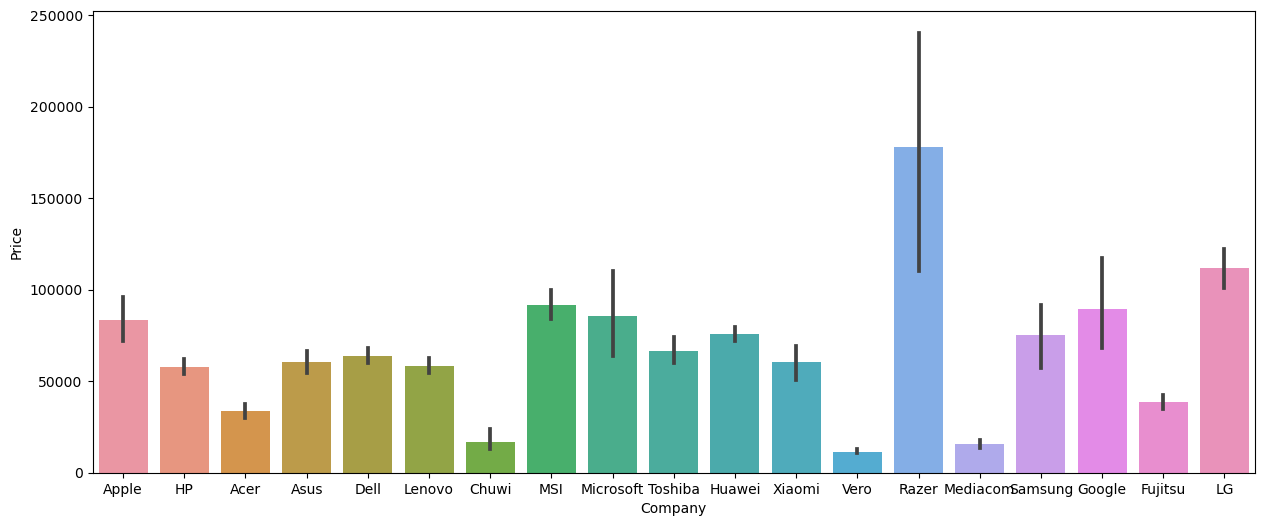

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Company'],y=df['Price'])

**--> As we compared among all the brands Razer is the most expansive than others**

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

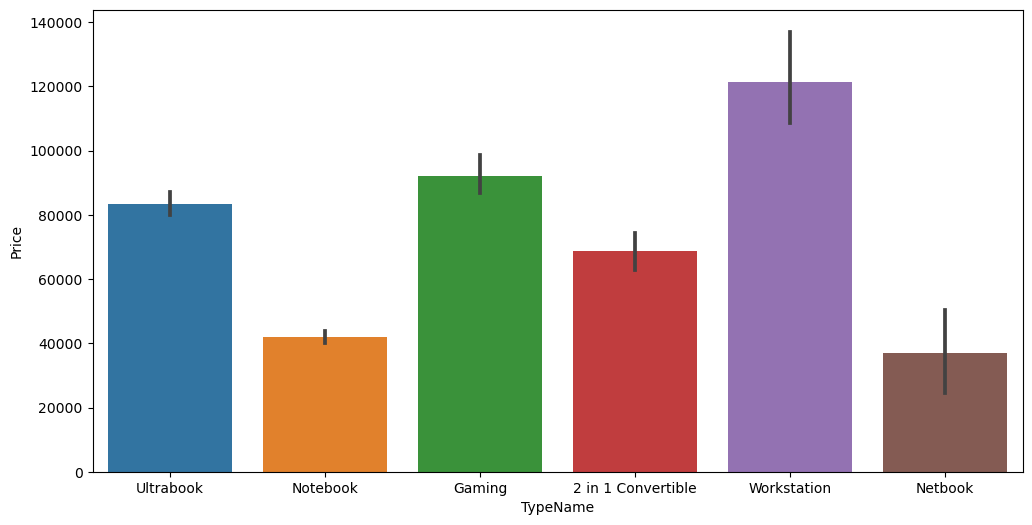

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['TypeName'],y=df['Price'])


**-->From the above graph we can conclude the Workstation Laptops have the Highest Price among the others**

<AxesSubplot:xlabel='TypeName', ylabel='count'>

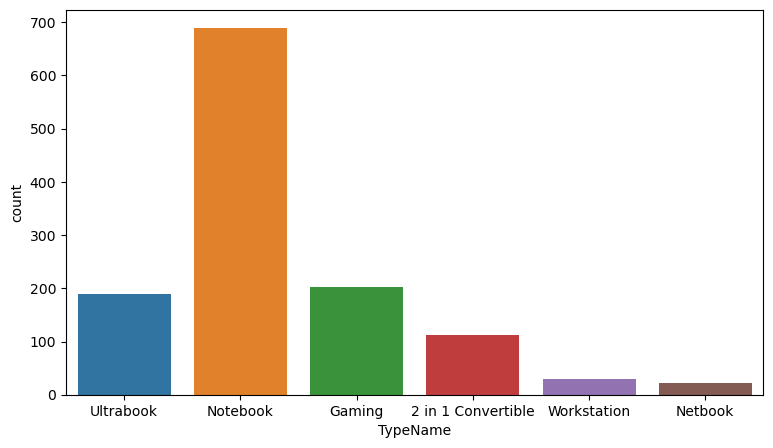

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x=df['TypeName'])

**-->From the above graph Notebook are the most in the dataset**

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                493
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 2880x1800            

In [ ]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [ ]:
df.drop(columns=['TouchScreen'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
df['TouchScreen']=df['ScreenResolution'].str.contains('Touchscreen').astype('int')

In [ ]:
df['IPS']=df['ScreenResolution'].str.contains('IPS').astype('int')

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [ ]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     126
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 6440HQ 2.6GHz      1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

In [ ]:
df['TouchScreen'].value_counts()

0    1063
1     181
Name: TouchScreen, dtype: int64

In [ ]:
df['IPS'].value_counts()

0    893
1    351
Name: IPS, dtype: int64

In [ ]:
df['Resolution']=df['ScreenResolution'].str.extract(r'(\d+x\d+)')

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560x1600


In [ ]:
df[['X_res','Y_res']]=df['Resolution'].str.split('x',expand=True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,Resolution,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560x1600,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440x900,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880x1800,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560x1600,2560,1600


In [ ]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   float64
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float64
 10  Price             1244 non-null   float64
 11  TouchScreen       1244 non-null   int32  
 12  IPS               1244 non-null   int32  
 13  Resolution        1244 non-null   object 
 14  X_res             1244 non-null   int32  
 15  Y_res             1244 non-null   int32  
dtypes: float64(4), int32(4), object(8)
memory 

In [ ]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
df.drop(columns=['Resolution'],inplace=True)

In [ ]:
df['ppi']=(df['X_res']**2+df['Y_res']**2)**0.5/df['Inches']

In [ ]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [ ]:
df['Cpu_Model'] = df['Cpu'].str.extract(r'(\b\w+\s\w+(?:\s\w+)?(?:-\w+)?)')

In [ ]:
df['Cpu_Model'].value_counts()

Intel Core i7          503
Intel Core i5          410
Intel Core i3          132
Intel Celeron Dual      68
Intel Pentium Quad      27
Intel Core M            17
AMD A9-Series           15
AMD A6-Series           11
AMD E-Series             9
Intel Celeron Quad       8
AMD A12-Series           8
AMD A10-Series           6
AMD A8-Series            4
Intel Atom x5-Z8350      4
AMD Ryzen 1700           3
Intel Pentium Dual       3
Intel Atom x5-Z8550      3
Intel Xeon E3-1505M      2
Intel Xeon E3-1535M      2
Intel Atom X5-Z8350      2
AMD FX 9830P             1
Intel Atom x5-Z8300      1
AMD Ryzen 1600           1
Intel Atom Z8350         1
AMD A4-Series            1
AMD FX 8800P             1
Samsung Cortex A72       1
Name: Cpu_Model, dtype: int64

In [ ]:
def cpunames(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processosr'
    else:
        return 'AMD'
df['cpu_brand']=df['Cpu_Model'].apply(cpunames)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_Model,cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [ ]:
df['cpu_brand'].value_counts()

Intel Core i7             503
Intel Core i5             410
Other Intel Processosr    138
Intel Core i3             132
AMD                        61
Name: cpu_brand, dtype: int64

In [ ]:
df['Gpu_Model']=df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df.drop(columns=['Cpu_Model'],inplace=True)

In [ ]:
df.drop(columns=['Cpu'],inplace=True)

In [ ]:
df.drop(columns=['Gpu'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_brand,Gpu_Model
0,Apple,Ultrabook,8.0,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8.0,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8.0,256GB SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16.0,512GB SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8.0,256GB SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel


In [ ]:
df['Gpu_Model'].value_counts()

Intel     684
Nvidia    389
AMD       170
ARM         1
Name: Gpu_Model, dtype: int64

<AxesSubplot:xlabel='cpu_brand', ylabel='count'>

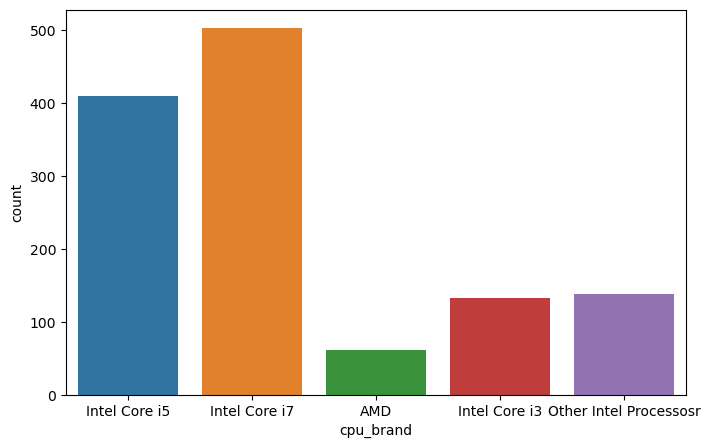

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['cpu_brand'],data=df)

<AxesSubplot:xlabel='cpu_brand', ylabel='Price'>

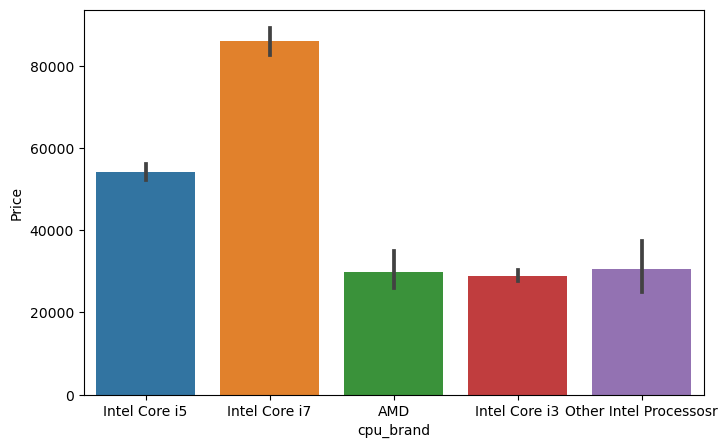

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['cpu_brand'],y=df['Price'])

<AxesSubplot:xlabel='Gpu_Model', ylabel='count'>

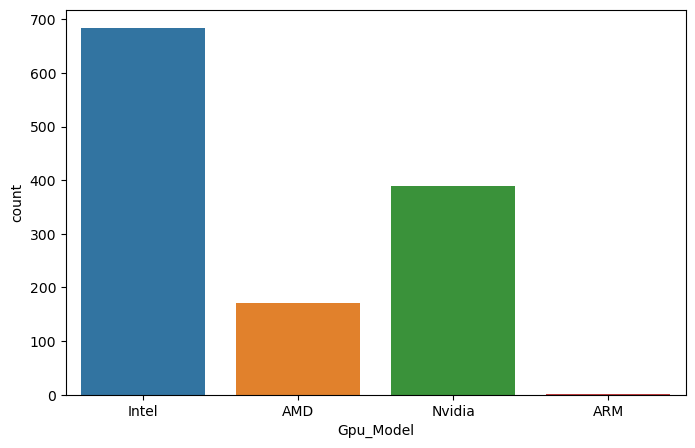

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Gpu_Model'],data=df)

<AxesSubplot:xlabel='Gpu_Model', ylabel='Price'>

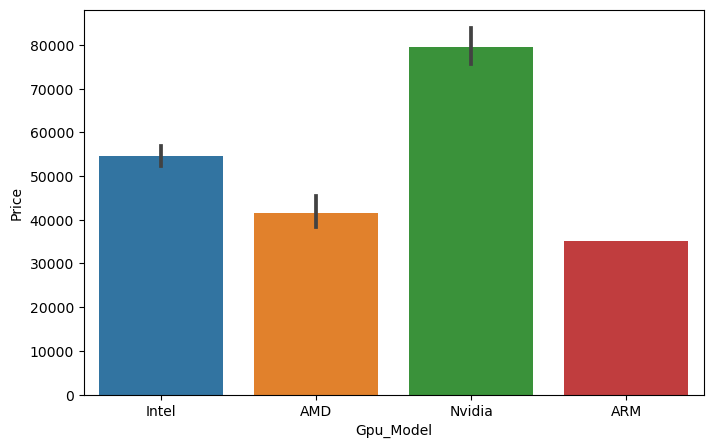

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Gpu_Model'],y=df['Price'])

In [ ]:
df['Memory'].value_counts()

256GB SSD                        401
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
df['OpSys'].value_counts()

Windows 10      1022
No OS             63
Linux             57
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: OpSys, dtype: int64

In [ ]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')

In [ ]:
x=df['Memory'].str.split('+',n=1,expand=True)


In [ ]:
df['first']=x[0]
df['first']=df['first'].str.strip()
df['second']=x[1]

In [ ]:
df['layer_1_SSD']=df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['layer_1_HDD']=df['first'].apply(lambda x:1 if 'HDD' in x else 0)

In [ ]:
m=df['first'].mode()[0]
m

'256'

In [ ]:
df['first']=df['first'].str.replace(r'\D','')

In [ ]:
df['first']=df['first'].replace('',m)

In [ ]:
df['second'].fillna('0',inplace=True)
df['layer_2_SSD']=df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['layer_2_HDD']=df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['second']=df['second'].str.replace(r'\D','')

In [ ]:
df['first']=df['first'].astype(int)

df['second']=df['second'].astype(int)

In [ ]:
df['SSD']=df['first']*df['layer_1_SSD']+df['second']*df['layer_2_SSD']

df['HDD']=df['first']*df['layer_1_HDD']+df['second']*df['layer_2_HDD']

In [ ]:
df.drop(columns=['Memory','first','second','layer_1_SSD','layer_1_HDD','layer_2_SSD','layer_2_HDD'],inplace=True)

In [ ]:
df['OpSys'].value_counts()

Windows 10      1022
No OS             63
Linux             57
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: OpSys, dtype: int64

In [ ]:
def operating_systems(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac'
    else:
        return 'others/No os/Linux'
df['OS']=df['OpSys'].apply(operating_systems)

In [ ]:
df.drop(columns=['OpSys'],inplace=True)

<AxesSubplot:xlabel='OS', ylabel='count'>

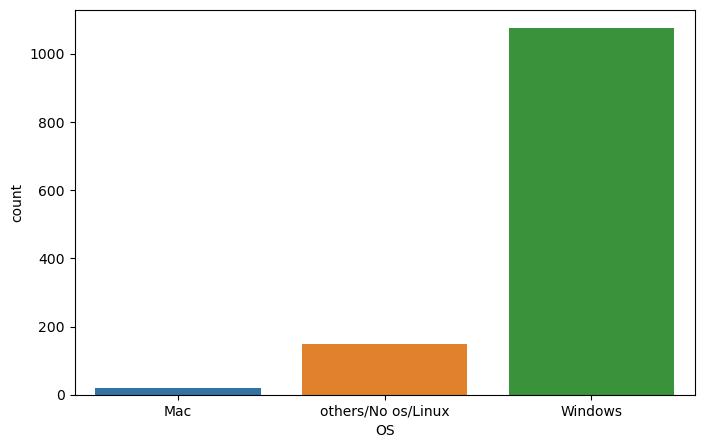

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['OS'],data=df)

<AxesSubplot:xlabel='OS', ylabel='Price'>

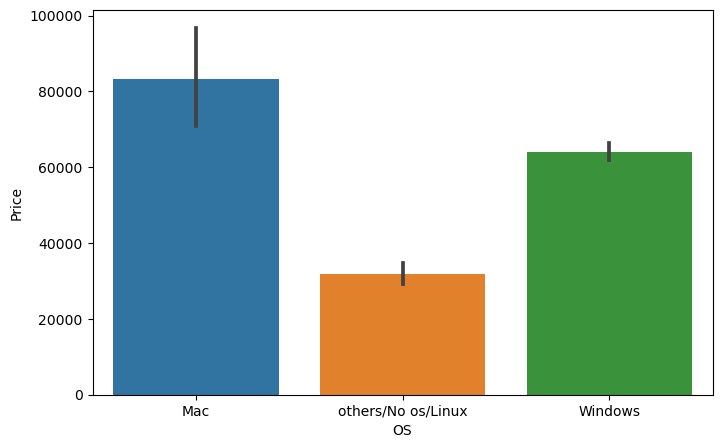

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['OS'],y=df['Price'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1244 non-null   object 
 1   TypeName     1244 non-null   object 
 2   Ram          1244 non-null   float64
 3   Weight       1244 non-null   float64
 4   Price        1244 non-null   float64
 5   TouchScreen  1244 non-null   int32  
 6   IPS          1244 non-null   int32  
 7   ppi          1244 non-null   float64
 8   cpu_brand    1244 non-null   object 
 9   Gpu_Model    1244 non-null   object 
 10  SSD          1244 non-null   int64  
 11  HDD          1244 non-null   int64  
 12  OS           1244 non-null   object 
dtypes: float64(4), int32(2), int64(2), object(5)
memory usage: 116.8+ KB


In [ ]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,cpu_brand,Gpu_Model,SSD,HDD,OS
0,Apple,Ultrabook,8.0,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,128,0,Mac
1,Apple,Ultrabook,8.0,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,0,0,Mac
2,HP,Notebook,8.0,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,256,0,others/No os/Linux
3,Apple,Ultrabook,16.0,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,512,0,Mac
4,Apple,Ultrabook,8.0,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,256,0,Mac


In [ ]:
# We have to encode the columns
# Company, TypeName, cpu_brand, Gpu_model, OS

In [ ]:
for i in df[['Company', 'TypeName', 'cpu_brand', 'Gpu_Model', 'OS']]:
    x= df[i].value_counts()
    print(x)
    print('================================')

Lenovo       282
Dell         281
HP           260
Asus         149
Acer         101
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: Company, dtype: int64
Notebook              689
Gaming                203
Ultrabook             189
2 in 1 Convertible    112
Workstation            29
Netbook                22
Name: TypeName, dtype: int64
Intel Core i7             503
Intel Core i5             410
Other Intel Processosr    138
Intel Core i3             132
AMD                        61
Name: cpu_brand, dtype: int64
Intel     684
Nvidia    389
AMD       170
ARM         1
Name: Gpu_Model, dtype: int64
Windows               1075
others/No os/Linux     148
Mac                     21
Name: OS, dtype: int64


In [ ]:
lap_data=df.copy()

In [ ]:
lap_data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,cpu_brand,Gpu_Model,SSD,HDD,OS
0,Apple,Ultrabook,8.0,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,128,0,Mac
1,Apple,Ultrabook,8.0,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,0,0,Mac
2,HP,Notebook,8.0,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,256,0,others/No os/Linux
3,Apple,Ultrabook,16.0,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,512,0,Mac
4,Apple,Ultrabook,8.0,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,256,0,Mac


In [ ]:
lap_data=pd.get_dummies(lap_data,columns=['Company', 'TypeName', 'cpu_brand', 'Gpu_Model', 'OS'],drop_first=True)

In [ ]:
lap_data.head()

,Ram,Weight,Price,TouchScreen,IPS,ppi,SSD,HDD,Company_Apple,Company_Asus,...,TypeName_Workstation,cpu_brand_Intel Core i3,cpu_brand_Intel Core i5,cpu_brand_Intel Core i7,cpu_brand_Other Intel Processosr,Gpu_Model_ARM,Gpu_Model_Intel,Gpu_Model_Nvidia,OS_Windows,OS_others/No os/Linux
0,8.0,1.37,71378.6832,0,1,226.983005,128,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,8.0,1.34,47895.5232,0,0,127.677940,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,8.0,1.86,30636.0000,0,0,141.211998,256,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,16.0,1.83,135195.3360,0,1,220.534624,512,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,8.0,1.37,96095.8080,0,1,226.983005,256,0,1,0,...,0,0,1,0,0,0,1,0,0,0


<AxesSubplot:xlabel='Price', ylabel='Density'>

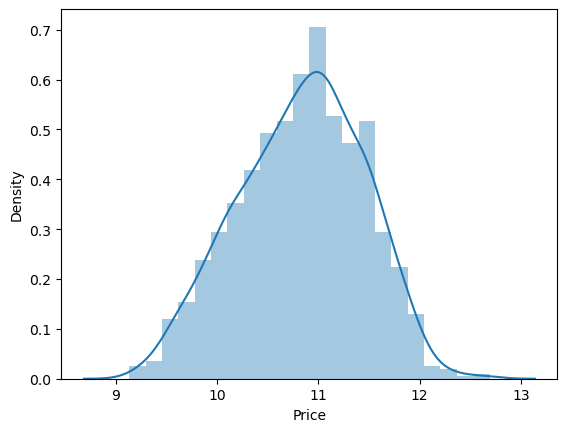

In [ ]:
import numpy as p
sns.distplot(np.log(lap_data['Price']))

In [ ]:
y=np.log(lap_data['Price'])
X=lap_data.drop(columns=['Price'])

In [ ]:
X.head()

,Ram,Weight,TouchScreen,IPS,ppi,SSD,HDD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Workstation,cpu_brand_Intel Core i3,cpu_brand_Intel Core i5,cpu_brand_Intel Core i7,cpu_brand_Other Intel Processosr,Gpu_Model_ARM,Gpu_Model_Intel,Gpu_Model_Nvidia,OS_Windows,OS_others/No os/Linux
0,8.0,1.37,0,1,226.983005,128,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,8.0,1.34,0,0,127.677940,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,8.0,1.86,0,0,141.211998,256,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,16.0,1.83,0,1,220.534624,512,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8.0,1.37,0,1,226.983005,256,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1239    10.555257
1240    10.433899
1241    11.288115
1242     9.409283
1243    10.614129
Name: Price, Length: 1244, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,Ram,Weight,TouchScreen,IPS,ppi,SSD,HDD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Workstation,cpu_brand_Intel Core i3,cpu_brand_Intel Core i5,cpu_brand_Intel Core i7,cpu_brand_Other Intel Processosr,Gpu_Model_ARM,Gpu_Model_Intel,Gpu_Model_Nvidia,OS_Windows,OS_others/No os/Linux
306,8.0,2.33,0,0,141.211998,128,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1220,4.0,2.20,0,0,100.454670,0,500,0,0,0,...,0,0,0,0,1,0,1,0,0,1
977,4.0,1.20,0,0,165.632118,128,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
548,4.0,1.25,1,1,189.905791,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
96,12.0,2.62,0,1,141.211998,128,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,8.0,1.26,0,0,176.232574,256,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1095,4.0,2.09,0,0,100.454670,0,500,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1130,8.0,2.50,0,0,141.211998,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
860,4.0,1.65,0,0,111.141337,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
y_train

306     10.713714
1220     9.756305
977     11.061462
548      9.830633
96      11.105660
          ...    
1044    11.064804
1095    10.236346
1130    10.645681
860      9.827764
1126    11.694549
Name: Price, Length: 995, dtype: float64

In [ ]:
LR=LinearRegression()

In [ ]:
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=LR.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)

In [ ]:
print('The MSE value is :', MSE)
RMSE=np.sqrt(MSE)
print('The RMSE Value is : ',RMSE)
print('The R2_score value is :',R2_score)

The MSE value is : 0.07381942109038052
The RMSE Value is :  0.2716972968035945
The R2_score value is : 0.7906440968637005


In [ ]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [ ]:
RFR=RandomForestRegressor()

In [ ]:
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred1=RFR.predict(X_test)

In [ ]:
MSE=mean_squared_error(y_test,y_pred1)
R2_score=r2_score(y_test,y_pred1)

In [ ]:
print('The MSE value is :',MSE)
RMSE=np.sqrt(MSE)
print('The RMSE value is :',RMSE)
print('The R2_Score value is :',R2_score)

The MSE value is : 0.056325792476937885
The RMSE value is : 0.2373305552956422
The R2_Score value is : 0.8402569814325764


In [ ]:
ABR=AdaBoostRegressor()

In [ ]:
ABR.fit(X_train,y_train)

AdaBoostRegressor()

In [ ]:
y_pred2=ABR.predict(X_test)

In [ ]:
MSE=mean_squared_error(y_test,y_pred2)
R2_score=r2_score(y_test,y_pred2)

In [ ]:
print('The MSE Value is :',MSE)
RMSE=np.sqrt(MSE)
print('The RMSE value is :',RMSE)
print('The r2_score value is :',R2_score)

The MSE Value is : 0.07507942211887267
The RMSE value is : 0.2740062446713079
The r2_score value is : 0.7870706652467053
